### Вертикальная линия `axvline` (горизонтальная будет `axhline`)

- **`axes.axvline(x=0, color='gray', linestyle='--', label='Асимптота $x=0$')`**  
  Добавляет вертикальную прямую на координате **x = 0** по всей высоте текущих осей (*Axes*).

- **`x = 0`** — координата, на которой проводится вертикальная прямая по всей высоте области *Axes*.  
- **`color='gray'`** — цвет линии; можно указывать стандартные имена цветов Matplotlib, HEX-коды или RGB-кортежи.  
- **`linestyle='--'`** — стиль линии (`'-'` — сплошная, `'--'` — пунктир, `':'` — точечная и т.д.).  
- **`label='Асимптота $x=0$'`** — текст для легенды; внутри `$ … $` поддерживается LaTeX-синтаксис.  


> Метод возвращает объект `Line2D`, свойства которого (толщина, прозрачность и пр.) можно изменить позднее.  
> При вызове `ax.legend()` или `fig.legend()` подпись из `label` автоматически появится в легенде.

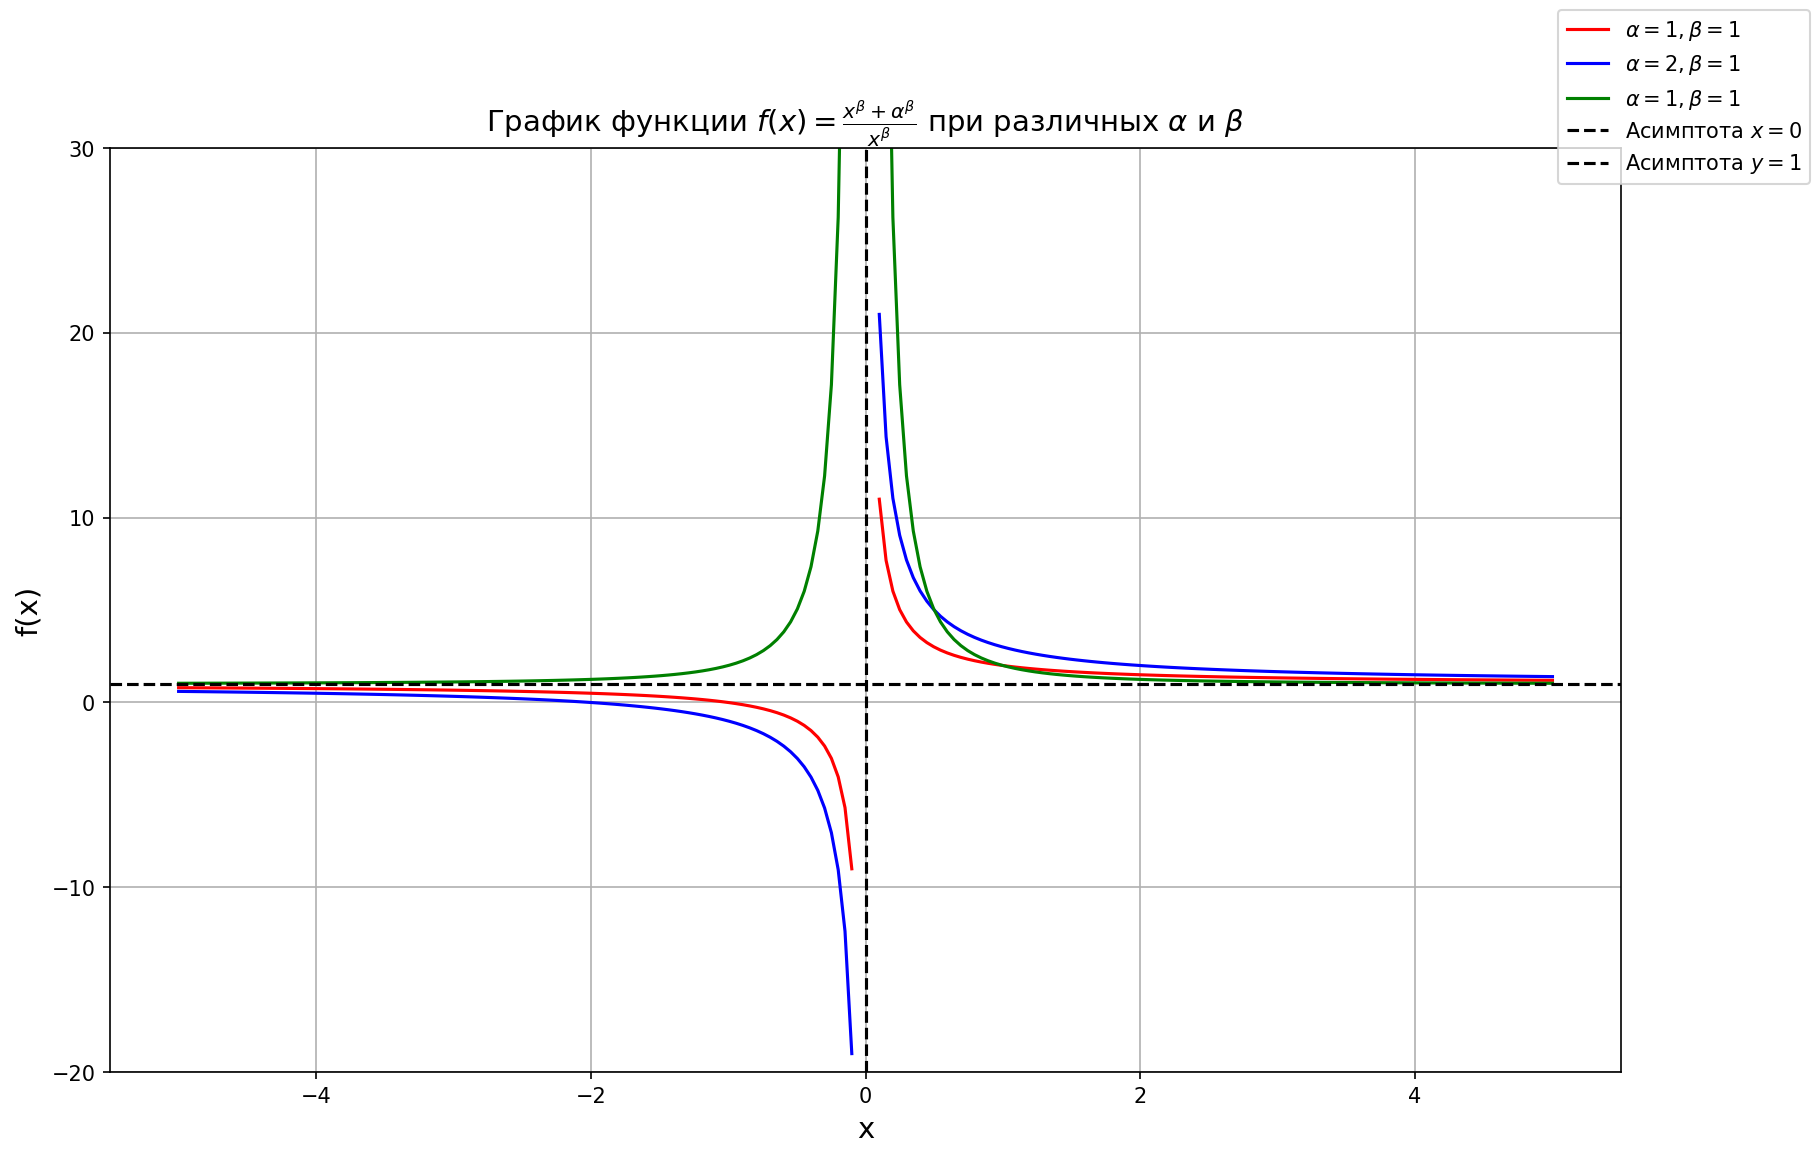

In [78]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def f(x, a, b):
    return (x ** b + a ** b) / (x ** b)

x_1 = np.linspace(0.1, 5, 100)
x_2 = np.linspace(-5, -0.1, 100)

fig, axes = plt.subplots(figsize=(13, 8), dpi=150)

axes.plot(x_1, f(x_1, 1, 1), c="red", label=r"$\alpha = 1, \beta = 1$")
axes.plot(x_2, f(x_2, 1, 1), c="red")

axes.plot(x_1, f(x_1, 2, 1), c="blue", label=r"$\alpha = 2, \beta = 1$")
axes.plot(x_2, f(x_2, 2, 1), c="blue")

axes.plot(x_1, f(x_1, 1, 2), c="green", label=r"$\alpha = 1, \beta = 1$")
axes.plot(x_2, f(x_2, 1, 2), c="green")

axes.set_ylim([-20, 30])
axes.set_xlabel("x", fontsize=14)
axes.set_ylabel("f(x)", fontsize=14)
axes.set_title(
    r"График функции $f(x) = \frac{x^\beta + \alpha^\beta}{x^\beta}$ при различных $\alpha$ и $\beta$",
    fontsize=14
)

# Дополнительно
axes.grid(True)
axes.axvline(x=0, color="black", linestyle="--", label=r"Асимптота $x = 0$")
axes.axhline(y=1, color="black", linestyle="--", label=r"Асимптота $y = 1$")

fig.legend()

fig.savefig("Задача_1.svg")

/var/folders/cr/kkk6yb8j5ml02kjf2pmnw19w0000gn/T/ipykernel_9789/2674273053.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


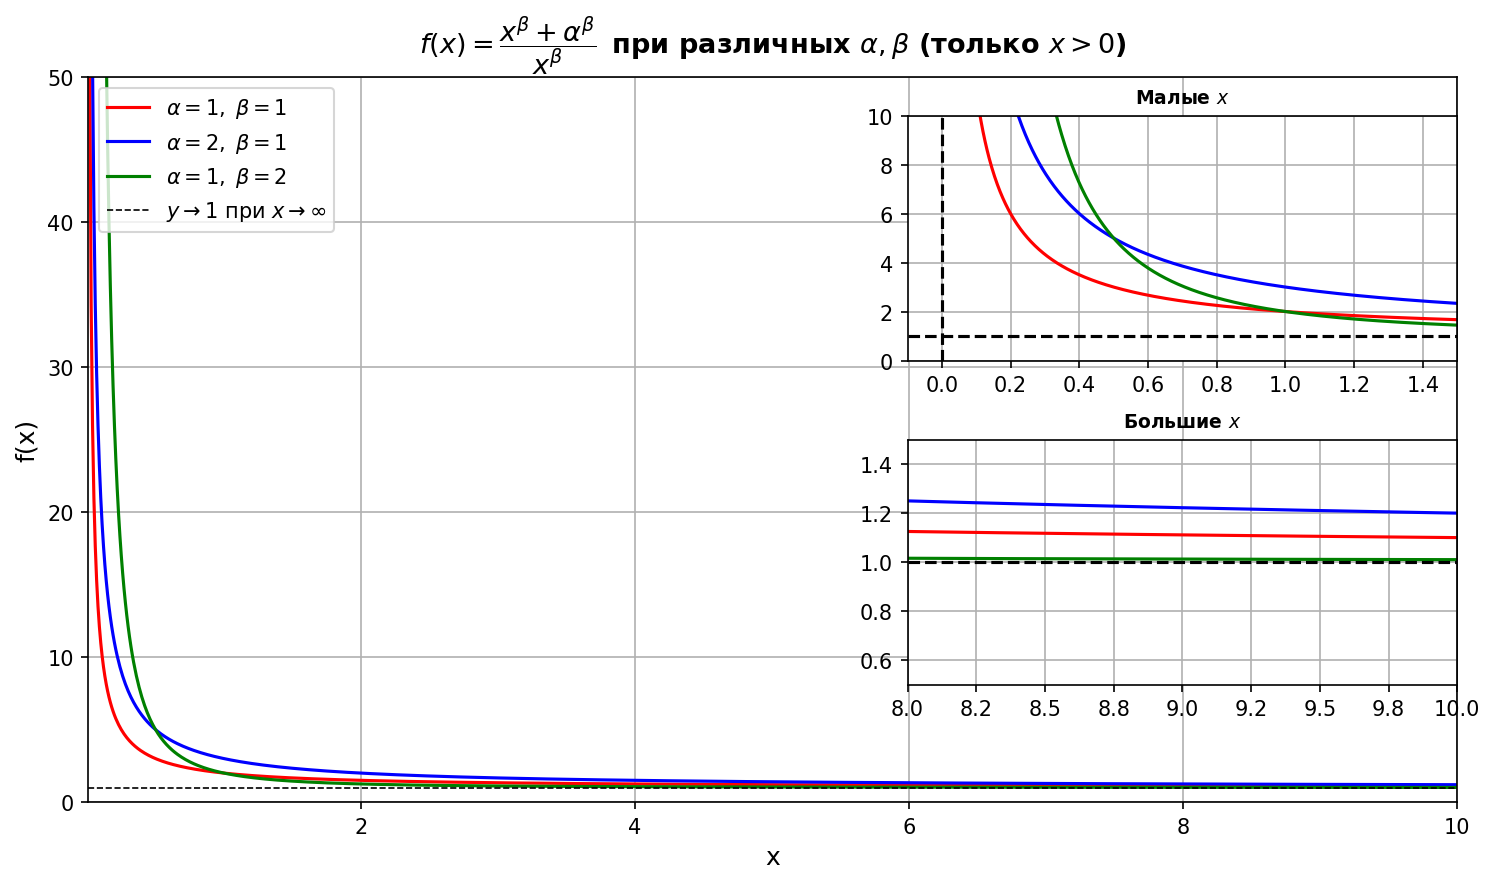

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter  

plt.rcParams["figure.dpi"] = 150  # чуть выше чёткость

def f(x, a, b):
    return (x**b + a**b) / (x**b)

# --- параметры функций ----------------------------------
params = [
    (1, 1, "red",   r"$\alpha=1,\;\beta=1$"),
    (2, 1, "blue",  r"$\alpha=2,\;\beta=1$"),
    (1, 2, "green", r"$\alpha=1,\;\beta=2$"),
]

# --- диапазоны для графиков -----------------------------
x_main  = np.linspace(0.01, 10, 1000)   # общий график x>0
x_small = np.linspace(0.01, 2,  1000) # «малые» x
x_large = np.linspace(7,    11,  1000)  # «большие» x

# --- создаём фигуру и основную ось ----------------------
fig, ax = plt.subplots(figsize=(10, 6))

for a, b, color, label in params:
    ax.plot(x_main,  f(x_main,  a, b), color=color, label=label)

ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("f(x)", fontsize=12)
ax.set_title(
    r"$f(x)=\dfrac{x^{\beta}+\alpha^{\beta}}{x^{\beta}}\,$ при различных $\alpha,\beta$ (только $x>0$)",
    fontweight="bold",
    fontsize=13
)
ax.grid(True)
ax.axhline(1, color="black", lw=0.8, ls="--", label=r"$y\to1$ при $x\to\infty$")
ax.set_xlim(x_main[0], x_main[-1])

ax.set_ylim([0, 50])

# --- врезка 1: малые x ----------------------------------

axes_small = fig.add_axes([0.61, 0.59, 0.3665, 0.272])

for a, b, color, _ in params:
    axes_small.plot(x_small, f(x_small, a, b), color=color)


axes_small.axhline(y=1, color="black", linestyle="--", label=r"Асимптота $y = 1$")
axes_small.axvline(x=0, color="black", linestyle="--", label=r"Асимптота $x = 0$")

axes_small.set_ylim([0, 10])
axes_small.set_xlim([-0.1, 1.5])
axes_small.set_title("Малые $x$", fontweight="bold", fontsize=9)
axes_small.grid(True)

# # --- врезка 2: большие x -------------------------------

axes_big = fig.add_axes([0.61, 0.23, 0.3665, 0.272])

for a, b, color, _ in params:
    axes_big.plot(x_large, f(x_large, a, b), color=color)


axes_big.axhline(y=1, color="black", linestyle="--", label=r"Асимптота $y = 1$")

axes_big.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

axes_big.set_ylim([0.5, 1.5])
axes_big.set_xlim([8, 10])
axes_big.set_title("Большие $x$", fontweight="bold", fontsize=9)
axes_big.grid(True)

# # --- легенды --------------------------------------------
ax.legend(fontsize=10, loc="upper left")

fig.tight_layout()
plt.show()

/var/folders/cr/kkk6yb8j5ml02kjf2pmnw19w0000gn/T/ipykernel_9789/1741548269.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


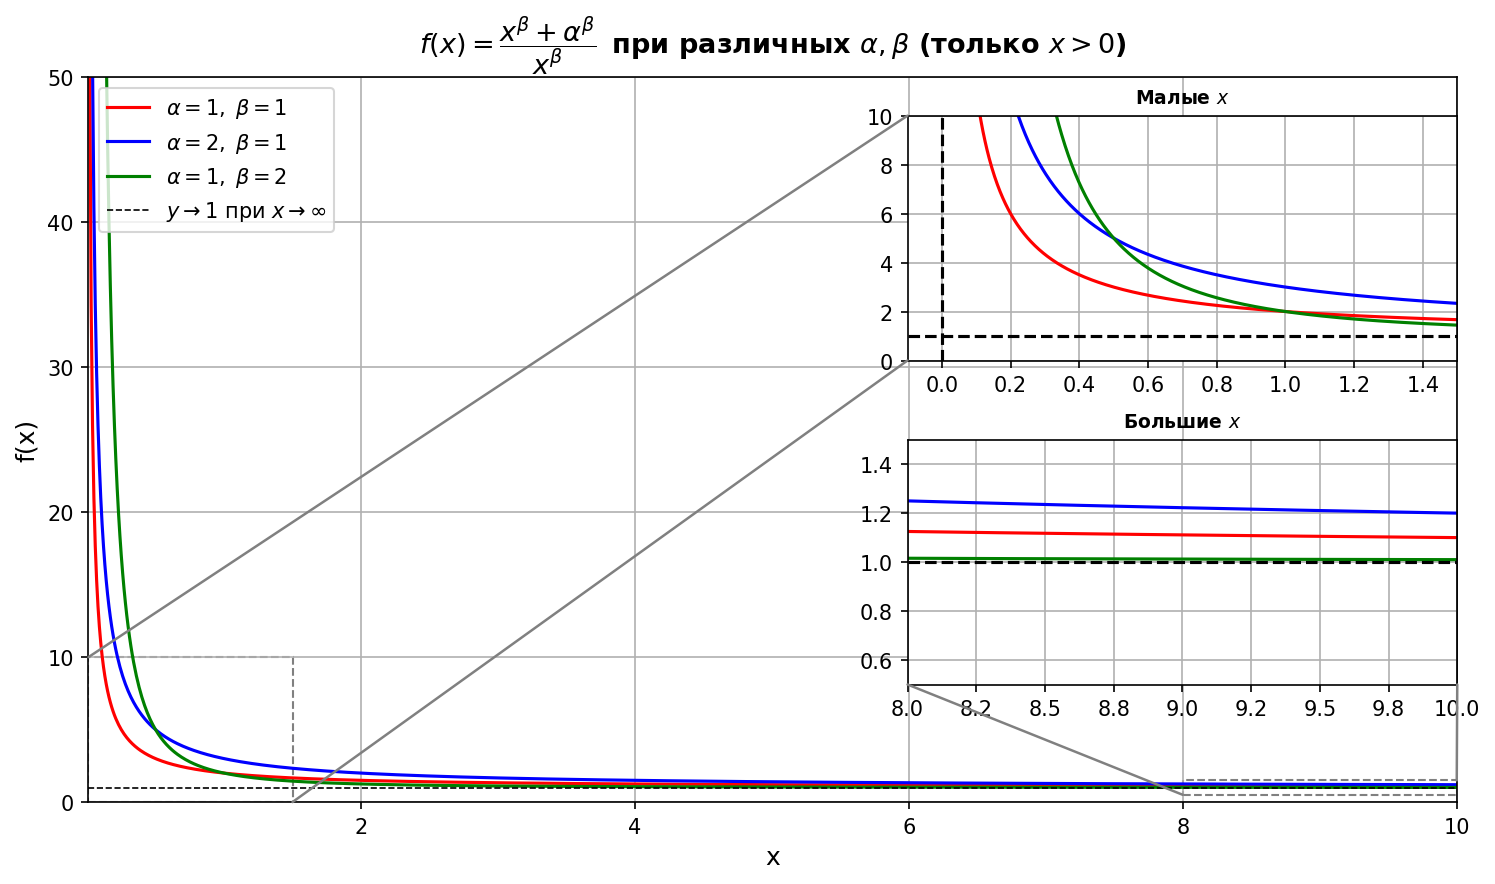

In [132]:
# Доработка: функция соединяет ПАРУ ПРОТИВОПОЛОЖНЫХ углов прямоугольника области
# с БЛИЖАЙШИМИ углами врезки (по экранным координатам). Выбирается та пара углов,
# для которой суммарная длина двух соединений минимальна.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter  
from matplotlib.patches import Rectangle, ConnectionPatch
import itertools

plt.rcParams["figure.dpi"] = 150

def f(x, a, b):
    return (x**b + a**b) / (x**b)

# --- параметры функций ----------------------------------
params = [
    (1, 1, "red",   r"$\alpha=1,\;\beta=1$"),
    (2, 1, "blue",  r"$\alpha=2,\;\beta=1$"),
    (1, 2, "green", r"$\alpha=1,\;\beta=2$"),
]

# --- диапазоны для графиков -----------------------------
x_main  = np.linspace(0.01, 10, 1000)   # общий график x>0
x_small = np.linspace(0.01, 2,  1000)   # «малые» x
x_large = np.linspace(7,    11,  1000)  # «большие» x

# --- создаём фигуру и основную ось ----------------------
fig, ax = plt.subplots(figsize=(10, 6))

for a, b, color, label in params:
    ax.plot(x_main,  f(x_main,  a, b), color=color, label=label)

ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("f(x)", fontsize=12)
ax.set_title(
    r"$f(x)=\dfrac{x^{\beta}+\alpha^{\beta}}{x^{\beta}}\,$ при различных $\alpha,\beta$ (только $x>0$)",
    fontweight="bold",
    fontsize=13
)
ax.grid(True)
ax.axhline(1, color="black", lw=0.8, ls="--", label=r"$y\to1$ при $x\to\infty$")
ax.set_xlim(x_main[0], x_main[-1])
ax.set_ylim([0, 50])

# --- врезка 1: малые x ----------------------------------
axes_small = fig.add_axes([0.61, 0.59, 0.3665, 0.272])
for a, b, color, _ in params:
    axes_small.plot(x_small, f(x_small, a, b), color=color)

axes_small.axhline(y=1, color="black", linestyle="--", label=r"Асимптота $y = 1$")
axes_small.axvline(x=0, color="black", linestyle="--", label=r"Асимптота $x = 0$")
axes_small.set_ylim([0, 10])
axes_small.set_xlim([-0.1, 1.5])
axes_small.set_title("Малые $x$", fontweight="bold", fontsize=9)
axes_small.grid(True)

# --- врезка 2: большие x -------------------------------
axes_big = fig.add_axes([0.61, 0.23, 0.3665, 0.272])
for a, b, color, _ in params:
    axes_big.plot(x_large, f(x_large, a, b), color=color)

axes_big.axhline(y=1, color="black", linestyle="--", label=r"Асимптота $y = 1$")
axes_big.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
axes_big.set_ylim([0.5, 1.5])
axes_big.set_xlim([8, 10])
axes_big.set_title("Большие $x$", fontweight="bold", fontsize=9)
axes_big.grid(True)

ax.legend(fontsize=10, loc="upper left")

fig.tight_layout()

# --- Универсальная функция соединения ---
def link_inset_to_region_nearest(ax_main, ax_inset, *, rect_ls="--", rect_lw=1.0, rect_ec="gray",
                                 conn_lw=1.0, conn_ec="gray"):
    """
    1) По текущим xlim/ylim врезки рисует прямоугольник области на основном графике (в координатах данных).
    2) Выбирает одну из двух пар противоположных углов прямоугольника (BL-TR или TL-BR).
    3) Для выбранной пары углов подбирает БЛИЖАЙШИЕ углы врезки (в экранных координатах), 
       обеспечивая разные углы врезки для двух соединений.
    4) Рисует две ConnectionPatch.
    """
    # Область, соответствующая текущим пределам врезки
    x0, x1 = ax_inset.get_xlim()
    y0, y1 = ax_inset.get_ylim()

    # Подрезаем по пределам видимой области основного графика
    xa0, xa1 = ax_main.get_xlim()
    ya0, ya1 = ax_main.get_ylim()
    rx0 = max(xa0, min(x0, x1))
    rx1 = min(xa1, max(x0, x1))
    ry0 = max(ya0, min(y0, y1))
    ry1 = min(ya1, max(y0, y1))

    if rx1 <= rx0 or ry1 <= ry0:
        return  # нечего соединять

    # Прямоугольник на основном графике
    rect = Rectangle((rx0, ry0), rx1 - rx0, ry1 - ry0,
                     fill=False, linestyle=rect_ls, linewidth=rect_lw, edgecolor=rect_ec)
    ax_main.add_patch(rect)

    # Углы прямоугольника области: нижн.-лев, верхн.-лев, нижн.-прав, верхн.-прав
    region_corners = {
        "BL": (rx0, ry0),
        "TL": (rx0, ry1),
        "BR": (rx1, ry0),
        "TR": (rx1, ry1),
    }

    # Две пары противоположных углов
    region_pairs = [("BL", "TR"), ("TL", "BR")]

    # Углы врезки (в координатах осей врезки)
    inset_corners = {
        "LL": (0, 0),
        "LR": (1, 0),
        "UL": (0, 1),
        "UR": (1, 1),
    }

    # Перед вычислением расстояний — принудительно отрисуем, чтобы трансформации были актуальны
    fig.canvas.draw()

    # Преобразуем все точки в экранные координаты (display coords) для корректного сравнения расстояний
    def to_disp_main(xy):  # точка данных на основном графике -> экр.
        return ax_main.transData.transform(xy)
    def to_disp_inset(xy_ax):  # точка в координатах осей врезки -> экр.
        return ax_inset.transAxes.transform(xy_ax)

    # Для каждой пары — найдём наилучшее сопоставление с двумя РАЗНЫМИ углами врезки
    best_choice = None  # (total_dist, ((reg_key1, ins_key1), (reg_key2, ins_key2)))
    for rp in region_pairs:
        reg_pts_disp = [to_disp_main(region_corners[k]) for k in rp]
        # все упорядоченные пары разных углов врезки (4P2 = 12 вариантов)
        for ins1, ins2 in itertools.permutations(inset_corners.keys(), 2):
            ins_pts_disp = [to_disp_inset(inset_corners[ins1]), to_disp_inset(inset_corners[ins2])]
            d = ((reg_pts_disp[0][0] - ins_pts_disp[0][0])**2 + (reg_pts_disp[0][1] - ins_pts_disp[0][1])**2)**0.5 \
              + ((reg_pts_disp[1][0] - ins_pts_disp[1][0])**2 + (reg_pts_disp[1][1] - ins_pts_disp[1][1])**2)**0.5
            if (best_choice is None) or (d < best_choice[0]):
                best_choice = (d, ((rp[0], ins1), (rp[1], ins2)))

    # Рисуем две ConnectionPatch по лучшему варианту
    (_, mapping) = best_choice
    for reg_key, ins_key in mapping:
        con = ConnectionPatch(
            xyA=region_corners[reg_key], coordsA=ax_main.transData,
            xyB=inset_corners[ins_key], coordsB=ax_inset.transAxes,
            linewidth=1.2, color="gray"
        )
        fig.add_artist(con)

# Соединяем обе врезки
link_inset_to_region_nearest(ax, axes_small)
link_inset_to_region_nearest(ax, axes_big)

# out_path = "/mnt/data/grafik_vrezki_s_blyzhaishimi_uglamii.png"
# fig.savefig(out_path, bbox_inches="tight", dpi=200)
plt.show()

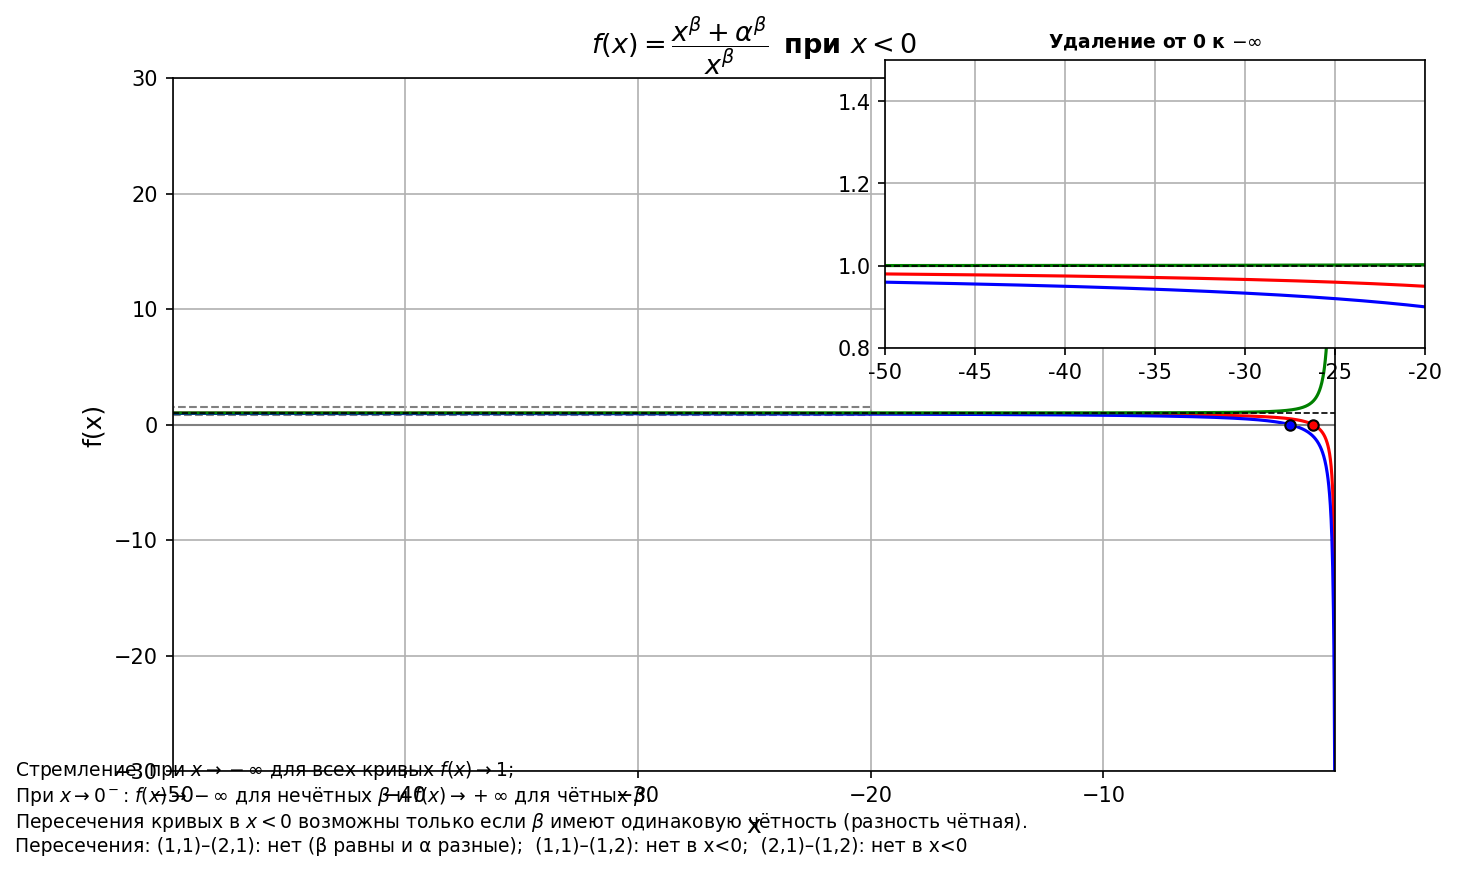

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.patches import Rectangle, ConnectionPatch
import itertools

# --- функция -------------------------------------------------
def f(x, a, b):
    return (x**b + a**b) / (x**b)   # 1 + (a/x)^b

# --- параметры кривых (интегерные b!) -----------------------
params = [
    (1, 1, "red",   r"$\alpha=1,\;\beta=1$"),   # odd b
    (2, 1, "blue",  r"$\alpha=2,\;\beta=1$"),   # odd b
    (1, 2, "green", r"$\alpha=1,\;\beta=2$"),   # even b
]

# --- диапазоны -----------------------------------------------
x_main  = np.linspace(-50, -0.05, 3000)    # весь график: x<0
x_inset = np.linspace(-50, -20, 1500)      # врезка: далеко слева (удаление к -∞)

# --- фигура и ось --------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))
for a, b, color, label in params:
    ax.plot(x_main, f(x_main, a, b), color=color, label=label)

# базовая разметка
ax.set_xlabel("x", fontsize=12)
ax.set_ylabel("f(x)", fontsize=12)
ax.set_title(
    r"$f(x)=\dfrac{x^{\beta}+\alpha^{\beta}}{x^{\beta}}\,$ при $x<0$",
    fontweight="bold", fontsize=13
)
ax.grid(True)
ax.set_xlim(x_main[0], x_main[-1])
ax.set_ylim([-30, 30])  # чтобы увидеть расходимость при x -> 0-

# асимптоты и необходимые линии
ax.axhline(1, color="black", lw=0.8, ls="--", label=r"$y\to1$ при $x\to-\infty$")
ax.axhline(0, color="gray", lw=1.0, ls="-", label=r"$f(x)=0$")  # требуемая линия
ax.axvline(0, color="black", lw=0.8, ls=":")  # визуально: граница области x<0

# --- ВРЕЗКА: поведение при удалении к -∞ ---------------------
# размещение врезки (x,y,w,h) в долях от фигуры
ax_in = fig.add_axes([0.60, 0.58, 0.36, 0.32])
for a, b, color, _ in params:
    ax_in.plot(x_inset, f(x_inset, a, b), color=color)
ax_in.axhline(1, color="black", lw=0.8, ls="--")
ax_in.axhline(0, color="gray", lw=1.0, ls="-")
ax_in.set_xlim(x_inset[0], x_inset[-1])
# врезка сфокусирована на стремлении к 1
ax_in.set_ylim([0.8, 1.5])
ax_in.set_title("Удаление от 0 к $-\\infty$", fontweight="bold", fontsize=9)
ax_in.grid(True)
ax_in.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# --- функция соединения врезки с областью на основном графике ----------------
def link_inset_to_region_nearest(ax_main, ax_inset, *,
                                 rect_ls="--", rect_lw=1.0, rect_ec="gray",
                                 conn_lw=1.2, conn_ec="gray"):
    """
    Рисует прямоугольник области на основном графике по текущим xlim/ylim врезки
    и соединяет ПРОТИВОПОЛОЖНЫЕ углы прямоугольника с БЛИЖАЙШИМИ углами врезки
    (подбор пары, минимизирующей суммарную длину двух соединений, в экранных координатах).
    """
    x0, x1 = ax_inset.get_xlim()
    y0, y1 = ax_inset.get_ylim()

    xa0, xa1 = ax_main.get_xlim()
    ya0, ya1 = ax_main.get_ylim()
    rx0 = max(xa0, min(x0, x1))
    rx1 = min(xa1, max(x0, x1))
    ry0 = max(ya0, min(y0, y1))
    ry1 = min(ya1, max(y0, y1))
    if rx1 <= rx0 or ry1 <= ry0:
        return

    rect = Rectangle((rx0, ry0), rx1 - rx0, ry1 - ry0,
                     fill=False, linestyle=rect_ls, linewidth=rect_lw, edgecolor=rect_ec)
    ax_main.add_patch(rect)

    region_corners = {"BL": (rx0, ry0), "TL": (rx0, ry1), "BR": (rx1, ry0), "TR": (rx1, ry1)}
    region_pairs   = [("BL", "TR"), ("TL", "BR")]
    inset_corners  = {"LL": (0, 0), "LR": (1, 0), "UL": (0, 1), "UR": (1, 1)}

    fig.canvas.draw()  # актуализировать трансформации

    def to_disp_main(xy):  return ax_main.transData.transform(xy)
    def to_disp_inset(xy): return ax_inset.transAxes.transform(xy)

    best = None  # (dist_sum, ((reg_key1, ins_key1), (reg_key2, ins_key2)))
    for rp in region_pairs:
        R0, R1 = [to_disp_main(region_corners[k]) for k in rp]
        for ins1, ins2 in itertools.permutations(inset_corners.keys(), 2):
            I0 = to_disp_inset(inset_corners[ins1])
            I1 = to_disp_inset(inset_corners[ins2])
            d = np.hypot(R0[0]-I0[0], R0[1]-I0[1]) + np.hypot(R1[0]-I1[0], R1[1]-I1[1])
            if best is None or d < best[0]:
                best = (d, ((rp[0], ins1), (rp[1], ins2)))

    for reg_key, ins_key in best[1]:
        con = ConnectionPatch(xyA=region_corners[reg_key], coordsA=ax_main.transData,
                              xyB=inset_corners[ins_key],   coordsB=ax_inset.transAxes,
                              linewidth=conn_lw, color=conn_ec)
        fig.add_artist(con)

# соединяем врезку
link_inset_to_region_nearest(ax, ax_in)

# --- пересечения между кривыми (в x<0) ----------------------
def intersection_x_neg(a1, b1, a2, b2):
    """
    Решаем 1+(a1/x)^b1 = 1+(a2/x)^b2 -> x^(d) = (a2^b2)/(a1^b1) = R > 0, где d=b2-b1.
    В области x<0 решение существует ТОЛЬКО если d — чётное и d != 0.
    Тогда берём отрицательный корень: x = - R^(1/d).
    d=0 даёт совпадение кривых (если a1^b1=a2^b2) или отсутствие пересечения.
    """
    d = b2 - b1
    if d == 0:
        return None  # отдельный случай проверим выше
    if d % 2 != 0:
        return None  # нечётная степень -> единственный положительный корень
    R = (a2**b2) / (a1**b1)
    x0 = - R**(1.0/abs(d))   # берём отрицательный корень
    return x0

pairs_info = []
for i in range(len(params)):
    for j in range(i+1, len(params)):
        (a1, b1, _, _), (a2, b2, _, _) = params[i], params[j]
        if b1 == b2:
            status = "нет (β равны и α разные)" if a1 != a2 else "совпадают (беск. множество)"
            xi = None
        else:
            xi = intersection_x_neg(a1, b1, a2, b2)
            status = (f"x≈{xi:.3g}" if xi is not None and (x_main[0] <= xi <= x_main[-1]) else "нет в x<0")
        pairs_info.append(((a1,b1),(a2,b2), xi, status))
        # отметить точку пересечения на графике, если она есть в диапазоне
        if xi is not None and (x_main[0] <= xi <= x_main[-1]):
            yi = f(np.array([xi]), a1, b1)[0]
            ax.scatter([xi], [yi], s=25, zorder=5, c="k", marker="x")

# --- пересечения с f(x)=0 (для нечётных β: x=-α) -----------
for a, b, color, _ in params:
    if b % 2 == 1:
        x0 = -a
        if x_main[0] <= x0 <= x_main[-1]:
            ax.scatter([x0], [0], s=25, zorder=5, c=color, edgecolors="k")

# --- подпись с выводами -------------------------------------
# стремление и пересечения
conclusions = [
    r"Стремление: при $x\to-\infty$ для всех кривых $f(x)\to 1$;",
    r"При $x\to 0^-$: $f(x)\to -\infty$ для нечётных $\beta$ и $f(x)\to +\infty$ для чётных $\beta$.",
    r"Пересечения кривых в $x<0$ возможны только если $\beta$ имеют одинаковую чётность (разность чётная).",
]
pairs_text = ";  ".join([f"({a1},{b1})–({a2},{b2}): {status}"
                         for (a1,b1),(a2,b2),xi,status in pairs_info])
fig.text(0.02, 0.02, "\n".join(conclusions) + "\n" + "Пересечения: " + pairs_text, fontsize=9)

# --- легенда и показ ----------------------------------------
ax.legend(fontsize=10, loc="upper right")
plt.show()